# C. elegans Connectome Development Analysis

This notebook demonstrates the complete analysis pipeline for C. elegans connectome development using the DevoTG framework.

## Overview

We analyze temporal connectome data from Witvliet et al. 2021, covering developmental stages from birth to adulthood. The analysis includes:

1. **Data Loading and Processing**: Download and process connectome datasets
2. **Network Growth Analysis**: Analyze how the connectome develops over time
3. **Connection Stability**: Classify connections as stable, developmental, or variable
4. **Interactive Visualizations**: Create comprehensive visualizations
5. **Neural Network Animation**: Generate interactive temporal animations

## Dataset Information

- **Source**: Witvliet et al. 2021 - "Connectomes across development reveal principles of brain maturation"
- **Organism**: Caenorhabditis elegans
- **Timepoints**: 8 developmental stages from L1 larva to adult
- **Data Type**: Synaptic connections (chemical and electrical)


In [8]:
### define path for indexing correctly
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [9]:
### print current path
print(f"Current working directory: {Path.cwd()}")

Current working directory: /home/jayag/projects/DevoTG_final_exp/notebooks


In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from devotg.data import load_connectome_datasets
from devotg.analysis import analyze_connectome_network

warnings.filterwarnings('ignore')

print("DevoTG Connectome Analysis Framework")
print("=====================================")
print("All modules imported successfully!")

DevoTG Connectome Analysis Framework
All modules imported successfully!


## 1. Data Loading and Processing

First, we download the Witvliet connectome datasets and process them into a temporal graph format.

In [11]:
import os

# Paths
data_dir = "../data/connectome_datasets"
output_dir = "../data/processed_datasets"
processed_file = os.path.join(output_dir, "dtdg_edges_temporal.csv")  # example file to check

# Download and process connectome datasets only if not available
if os.path.exists(processed_file):
    print("✅ Dataset already available. Skipping download and processing.")
else:
    print("Downloading and processing connectome datasets...")
    print("This may take a few minutes for the first run.")
    try:
        loader = load_connectome_datasets(
            data_dir=data_dir,
            output_dir=output_dir
        )
        print("✅ Dataset processing complete!")
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Please check your internet connection and try again.")

✅ Dataset already available. Skipping download and processing.


In [12]:
# Load the processed datasets
nodes_df = pd.read_csv("../data/processed_datasets/dtdg_nodes.csv")
edges_df = pd.read_csv("../data/processed_datasets/dtdg_edges_temporal.csv")
summary_df = pd.read_csv("../data/processed_datasets/dtdg_summary_statistics.csv")

print("Dataset Overview:")
print(f"- Nodes: {len(nodes_df)}")
print(f"- Temporal edges: {len(edges_df)}")
print(f"- Timepoints: {len(summary_df)}")
print(f"- Developmental span: {summary_df['time_hours'].min()}-{summary_df['time_hours'].max()} hours")
print(f"- Stages: {', '.join(summary_df['stage'].unique())}")

Dataset Overview:
- Nodes: 225
- Temporal edges: 12954
- Timepoints: 8
- Developmental span: 0-45 hours
- Stages: L1, L2, L3, Adult


### Dataset Structure Exploration

Neuron Type Distribution:
  Sensory: 64 (28.4%)
  Inter: 43 (19.1%)
  Motor: 42 (18.7%)
  Muscle: 32 (14.2%)
  Modulatory: 31 (13.8%)
  Glia: 10 (4.4%)
  Unknown: 3 (1.3%)


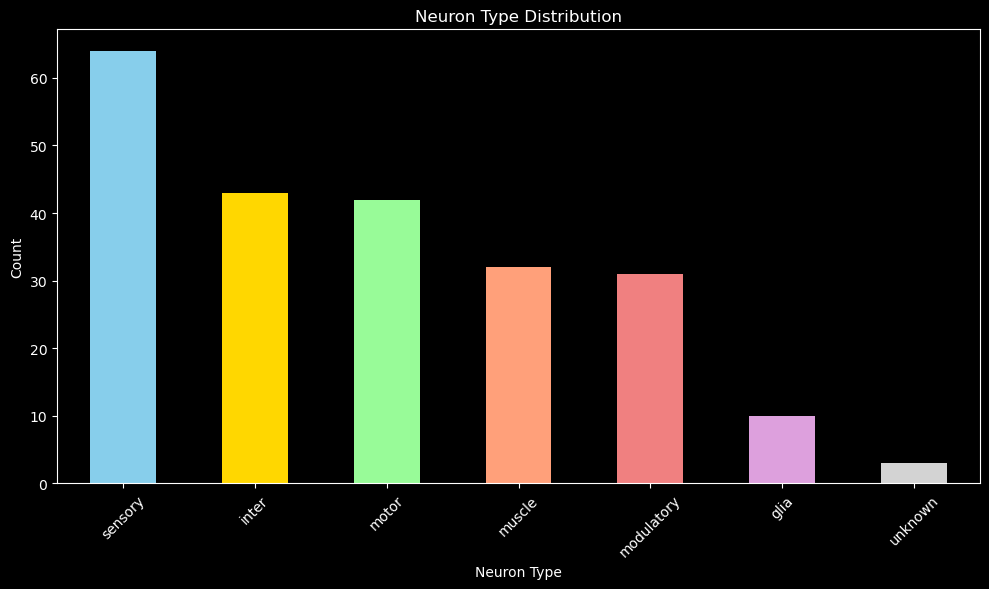

In [13]:
# Explore node types
print("Neuron Type Distribution:")
node_counts = nodes_df['node_type'].value_counts()
for node_type, count in node_counts.items():
    percentage = (count / len(nodes_df)) * 100
    print(f"  {node_type.capitalize()}: {count} ({percentage:.1f}%)")

# Plot node type distribution
plt.figure(figsize=(10, 6))
node_counts.plot(kind='bar', color=['#87CEEB', '#FFD700', '#98FB98', '#FFA07A', '#F08080', '#DDA0DD', '#D3D3D3'])
plt.title('Neuron Type Distribution')
plt.xlabel('Neuron Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Explore temporal development
print("\nTemporal Development Summary:")
summary_display = summary_df[['timepoint', 'stage', 'time_hours', 'description', 'num_edges', 'total_synapses']].copy()
summary_display.columns = ['TP', 'Stage', 'Hours', 'Description', 'Edges', 'Synapses']
print(summary_display.to_string(index=False))


Temporal Development Summary:
 TP Stage  Hours Description  Edges  Synapses
  1    L1      0       Birth    858      1400
  2    L1      5     L1 5hrs   1110      2028
  3    L1      8     L1 8hrs   1106      2237
  4    L1     16    L1 16hrs   1345      3020
  5    L2     23    L2 23hrs   1807      4535
  6    L3     27    L3 27hrs   1739      4723
  7 Adult     45 Adult 45hrs   2493      7867
  8 Adult     45 Adult 45hrs   2496      8400


## 2. Network Growth Analysis

Analyze how the connectome grows and changes across development.

In [15]:
# Perform comprehensive network analysis
print("Performing comprehensive network analysis...")

analyzer = analyze_connectome_network(
    edges_csv_path="../data/processed_datasets/dtdg_edges_temporal.csv",
    nodes_csv_path="../data/processed_datasets/dtdg_nodes.csv",
    output_dir="../outputs/connectome_analysis/statistics"
)

print("✅ Network analysis complete!")

Performing comprehensive network analysis...


✅ Network analysis complete!


In [16]:
# Load and display growth analysis results
growth_df = pd.read_csv("../outputs/connectome_analysis/statistics/network_growth_analysis.csv")

print("Network Growth Metrics:")
display_cols = ['timepoint', 'stage', 'num_edges', 'num_chemical', 'num_electrical', 'connection_density']
print(growth_df[display_cols].round(4).to_string(index=False))

Network Growth Metrics:
 timepoint stage  num_edges  num_chemical  num_electrical  connection_density
         1    L1        858           775              83              0.0170
         2    L1       1110           986             124              0.0220
         3    L1       1106          1012              94              0.0219
         4    L1       1345          1136             209              0.0267
         5    L2       1807          1515             292              0.0359
         6    L3       1739          1525             214              0.0345
         7 Adult       2493          2202             291              0.0495
         8 Adult       2496          2186             310              0.0495


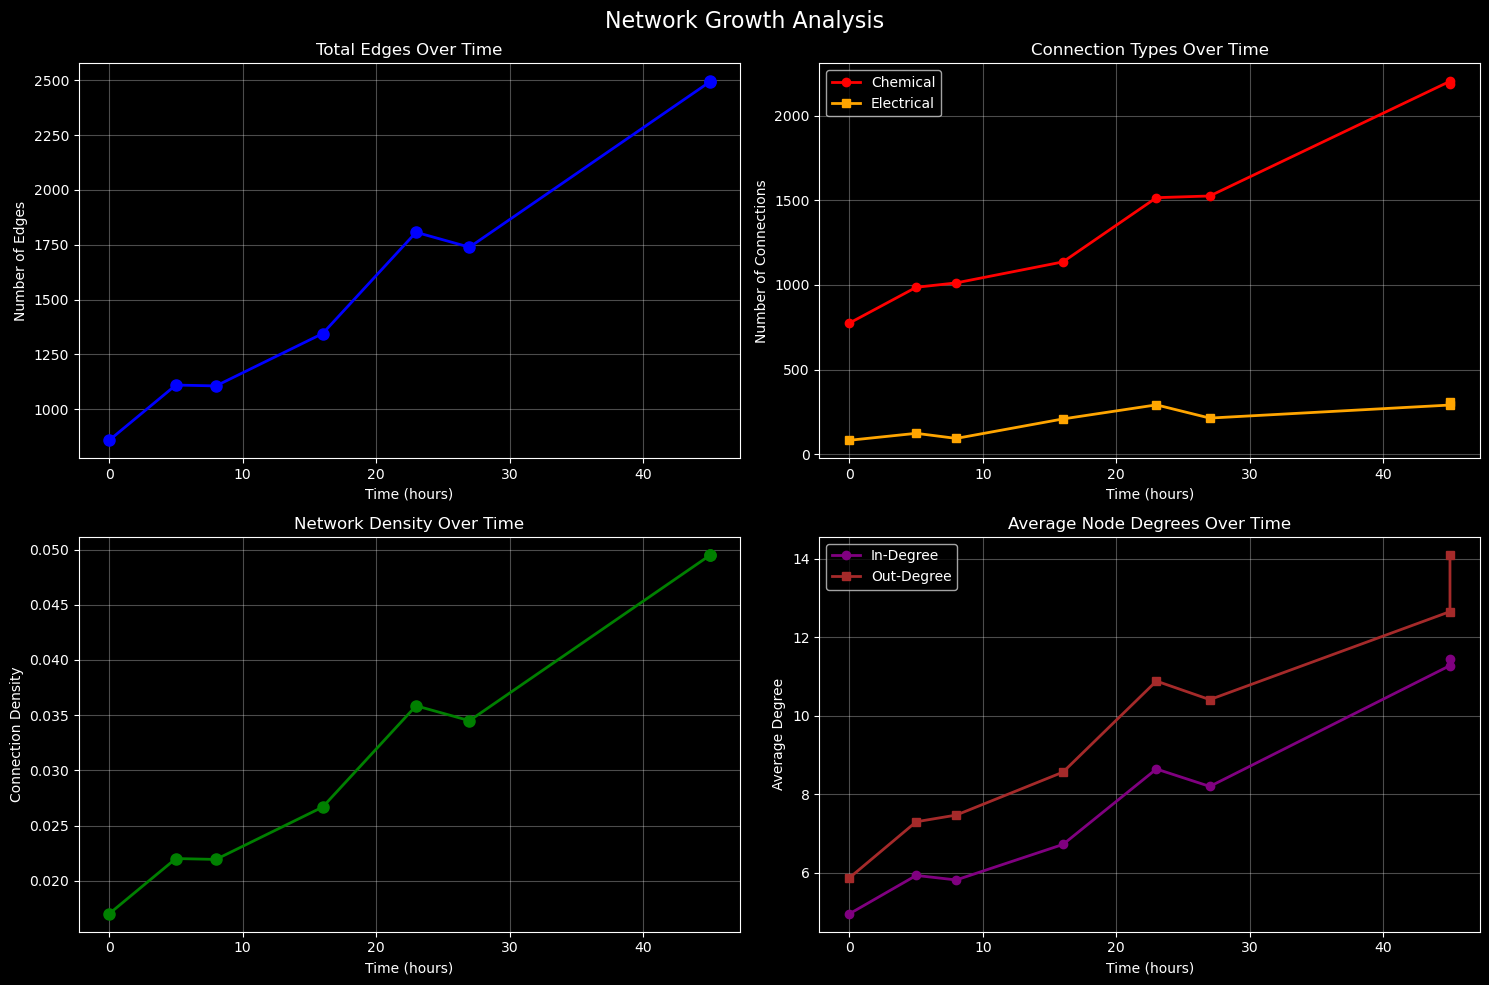

In [17]:
# Visualize network growth metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Network Growth Analysis', fontsize=16)

# Total edges over time
axes[0, 0].plot(growth_df['time_hours'], growth_df['num_edges'], 'o-', color='blue', linewidth=2, markersize=8)
axes[0, 0].set_title('Total Edges Over Time')
axes[0, 0].set_xlabel('Time (hours)')
axes[0, 0].set_ylabel('Number of Edges')
axes[0, 0].grid(True, alpha=0.3)

# Chemical vs Electrical
axes[0, 1].plot(growth_df['time_hours'], growth_df['num_chemical'], 'o-', color='red', label='Chemical', linewidth=2)
axes[0, 1].plot(growth_df['time_hours'], growth_df['num_electrical'], 's-', color='orange', label='Electrical', linewidth=2)
axes[0, 1].set_title('Connection Types Over Time')
axes[0, 1].set_xlabel('Time (hours)')
axes[0, 1].set_ylabel('Number of Connections')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Network density
axes[1, 0].plot(growth_df['time_hours'], growth_df['connection_density'], 'o-', color='green', linewidth=2, markersize=8)
axes[1, 0].set_title('Network Density Over Time')
axes[1, 0].set_xlabel('Time (hours)')
axes[1, 0].set_ylabel('Connection Density')
axes[1, 0].grid(True, alpha=0.3)

# Average degrees
axes[1, 1].plot(growth_df['time_hours'], growth_df['avg_in_degree'], 'o-', color='purple', label='In-Degree', linewidth=2)
axes[1, 1].plot(growth_df['time_hours'], growth_df['avg_out_degree'], 's-', color='brown', label='Out-Degree', linewidth=2)
axes[1, 1].set_title('Average Node Degrees Over Time')
axes[1, 1].set_xlabel('Time (hours)')
axes[1, 1].set_ylabel('Average Degree')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Connection Stability Analysis

Classify connections based on their temporal patterns.

Connection Stability Classification:
  Stable connections (≥7 timepoints): 650
  Developmental connections: 1207
  Variable connections: 2440
  Total unique connections: 4297


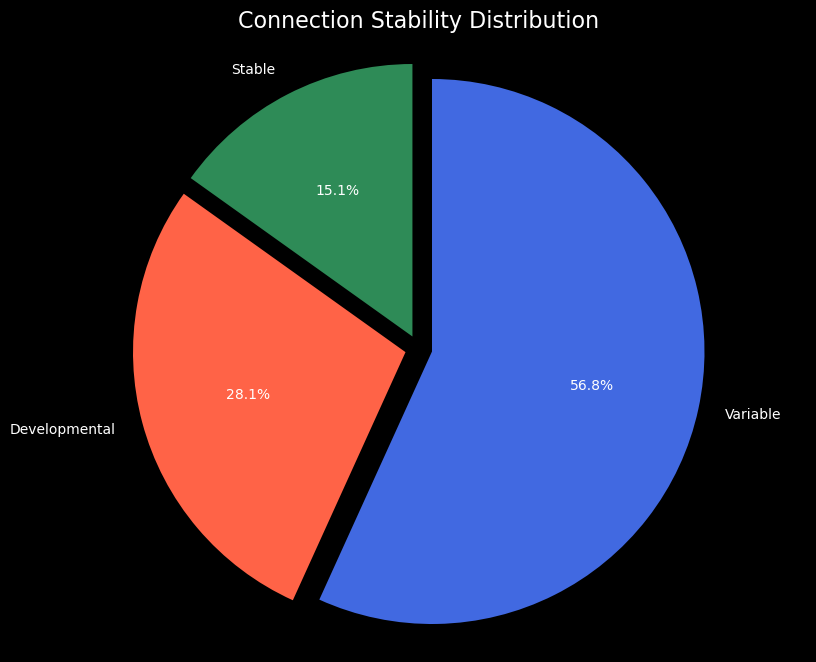

In [18]:
# Load connection stability analysis
stable_df = pd.read_csv("../outputs/connectome_analysis/statistics/stable_connections.csv")
developmental_df = pd.read_csv("../outputs/connectome_analysis/statistics/developmental_connections.csv")
variable_df = pd.read_csv("../outputs/connectome_analysis/statistics/variable_connections.csv")

print("Connection Stability Classification:")
print(f"  Stable connections (≥7 timepoints): {len(stable_df)}")
print(f"  Developmental connections: {len(developmental_df)}")
print(f"  Variable connections: {len(variable_df)}")
print(f"  Total unique connections: {len(stable_df) + len(developmental_df) + len(variable_df)}")

# Pie chart of connection types
plt.figure(figsize=(10, 8))
sizes = [len(stable_df), len(developmental_df), len(variable_df)]
labels = ['Stable', 'Developmental', 'Variable']
colors = ['#2E8B57', '#FF6347', '#4169E1']
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title('Connection Stability Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [19]:
# Analyze stable connections by type
if len(stable_df) > 0:
    print("\nStable Connections by Type:")
    stable_type_counts = stable_df['type'].value_counts()
    for conn_type, count in stable_type_counts.items():
        percentage = (count / len(stable_df)) * 100
        print(f"  {conn_type.capitalize()}: {count} ({percentage:.1f}%)")
    
    # Sample of stable connections
    print("\nSample Stable Connections:")
    sample_stable = stable_df.head(10)[['source_name', 'target_name', 'type', 'timepoints_present']]
    print(sample_stable.to_string(index=False))


Stable Connections by Type:
  Chemical: 609 (93.7%)
  Electrical: 41 (6.3%)

Sample Stable Connections:
source_name target_name       type  timepoints_present
       ADAL        ASHL electrical                   7
       ADAL        AVAL   chemical                   7
       ADAL        AVBL   chemical                   8
       ADAL        AVDR electrical                   7
       ADAL        AVJR   chemical                   8
       ADAL        RIML   chemical                   8
       ADAR        ASHR electrical                   8
       ADAR        AVAL   chemical                   7
       ADAR        AVBL   chemical                   8
       ADAR        AVBR   chemical                   8


## 4. Node Importance Analysis

Analyze how individual neuron importance changes over development.

In [20]:
# Load node importance data
importance_df = pd.read_csv("../outputs/connectome_analysis/statistics/node_importance_over_time.csv")

# Find top nodes by different centrality measures at final timepoint
final_tp = importance_df['timepoint'].max()
final_importance = importance_df[importance_df['timepoint'] == final_tp]

print(f"Top 10 Neurons by Different Centrality Measures (Timepoint {final_tp}):")
print("\nBy Degree Centrality:")
top_degree = final_importance.nlargest(10, 'degree_centrality')[['node', 'degree_centrality', 'node_type']]
print(top_degree.to_string(index=False))

print("\nBy Betweenness Centrality:")
top_betweenness = final_importance.nlargest(10, 'betweenness')[['node', 'betweenness', 'node_type']]
print(top_betweenness.to_string(index=False))

print("\nBy Total Weighted Degree:")
top_weighted = final_importance.nlargest(10, 'total_weighted_degree')[['node', 'total_weighted_degree', 'node_type']]
print(top_weighted.to_string(index=False))

Top 10 Neurons by Different Centrality Measures (Timepoint 8):

By Degree Centrality:
node  degree_centrality node_type
AIBL           0.252294     inter
RIML           0.252294     inter
AIBR           0.243119     inter
AVEL           0.238532     inter
RIBL           0.233945     inter
RMDL           0.233945     motor
RIMR           0.229358     inter
RIAR           0.224771     inter
RIBR           0.224771     inter
RIAL           0.215596     inter

By Betweenness Centrality:
 node  betweenness  node_type
 RIML     0.034856      inter
 AIBL     0.031508      inter
RMDDR     0.029688      motor
 RMFL     0.028037      motor
 RMGL     0.027723 modulatory
 AIZL     0.026506      inter
 RMDL     0.026106      motor
 AIBR     0.025387      inter
 RMGR     0.023928 modulatory
 RIAR     0.023808      inter

By Total Weighted Degree:
 node  total_weighted_degree node_type
 RIAR                    515     inter
 RIAL                    478     inter
 AIBR                    245     inter

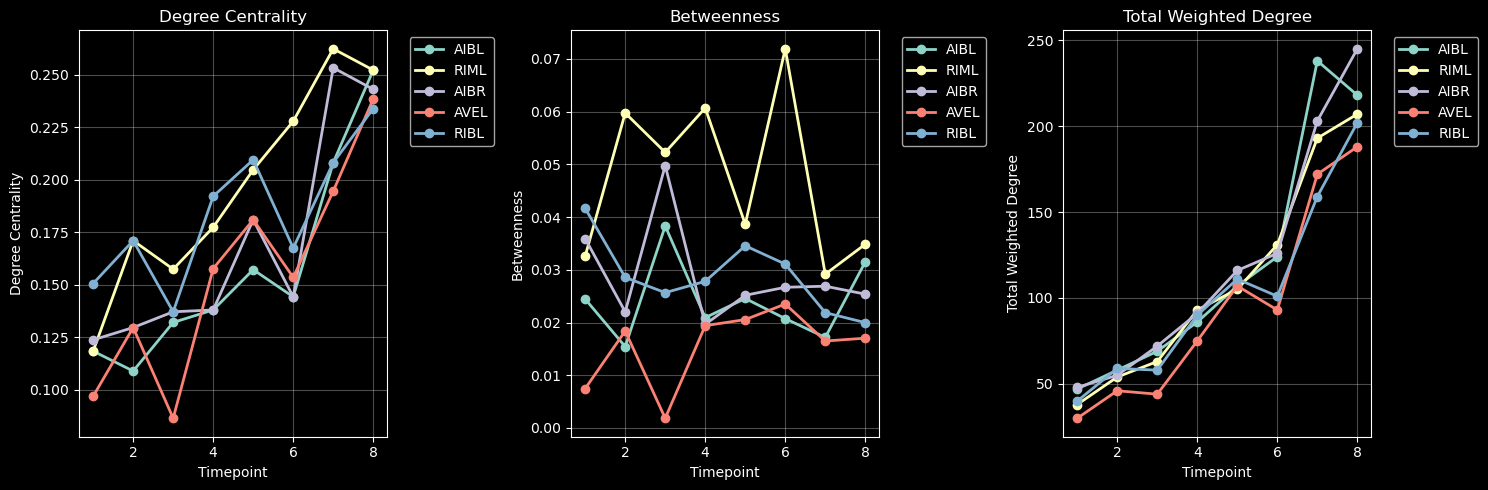

In [21]:
# Visualize centrality evolution for top nodes
top_5_nodes = final_importance.nlargest(5, 'degree_centrality')['node'].tolist()

plt.figure(figsize=(15, 5))

for i, measure in enumerate(['degree_centrality', 'betweenness', 'total_weighted_degree']):
    plt.subplot(1, 3, i+1)
    
    for node in top_5_nodes:
        node_data = importance_df[importance_df['node'] == node]
        plt.plot(node_data['timepoint'], node_data[measure], 'o-', label=node, linewidth=2)
    
    plt.title(f'{measure.replace("_", " ").title()}')
    plt.xlabel('Timepoint')
    plt.ylabel(measure.replace('_', ' ').title())
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()